In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import sys,os
sys.path.insert(0,'../..')
import numpy as np
from scipy.spatial import distance_matrix
import pandas as pd

#finding DSF respect to minimum spanning tree
from collections import defaultdict

global data_json

# For eil51

In [24]:
# filename = input("Write file name as this type (../Data/eil51_json_array.txt): ")
filename = "../../data/eil51_json_array.txt"
with open(filename, 'r') as myfile:
    data_json = myfile.read().replace('\n', '')
data_json = eval(data_json)
data_json = np.array(data_json)

global distance_data
distance_data = distance_matrix(data_json, data_json)
distance_data = distance_data.tolist()

In [25]:
t1 = time.time()

In [26]:
class Graph():
    global parent_list
    global root_list
    global weight_list

    parent_list = []
    root_list = []
    weight_list = []

    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)] for row in range(vertices)]

    def printMST(self, parent):
        print("Edge \tWeight")
        for i in range(1, self.V):
            # print (parent[i],"-",i,"\t",self.graph[i][ parent[i] ] )
            parent_list.append(parent[i])
            root_list.append(i)
            weight_list.append(self.graph[i][parent[i]])

    def minKey(self, key, mstSet):
        min = sys.maxsize

        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v
        return min_index

    def primMST(self):
        key = [sys.maxsize] * self.V
        parent = [None] * self.V
        key[0] = 0
        mstSet = [False] * self.V
        parent[0] = -1
        for cout in range(self.V):
            u = self.minKey(key, mstSet)
            mstSet[u] = True
            for v in range(self.V):
                if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
                    key[v] = self.graph[u][v]
                    parent[v] = u

        self.printMST(parent)

g = Graph(len(distance_data))
g.graph = distance_data
g.primMST()

Edge 	Weight


In [27]:
# converting df file
dictionary = {'Parent':parent_list,
              'Root':root_list,
              'weight':weight_list}
df = pd.DataFrame(dictionary)

In [28]:
class Graph:
    global opt_route
    opt_route = []

    def __init__(self):
        self.graph = defaultdict(list)

    def addEdge(self, u, v):
        self.graph[u].append(v)

    def DFSUtil(self, v, visited):
        visited[v] = True
        opt_route.append(v)
        for i in self.graph[v]:
            if visited[i] == False:
                self.DFSUtil(i, visited)

    def DFS(self, v):

        visited = [False] * (len(self.graph))

        self.DFSUtil(v, visited)

In [29]:
g = Graph()
for number in range(len(df)):
    g.addEdge(df['Parent'][number], df['Root'][number])
for number in range(len(df)):
    g.addEdge(df['Root'][number], df['Parent'][number])

print("Following is DFS from (starting from vertex 5)")
g.DFS(5)

Following is DFS from (starting from vertex 5)


In [30]:
global total_distance

total_distance = 0
for i in range(len(opt_route)):
    try:
        city_1 = opt_route[i]
        city_2 = opt_route[i+1]
        total_distance = total_distance + int(distance_data[city_1][city_2])+1
    except:
        city_1 = opt_route[i]
        city_2 = opt_route[0]
        total_distance = total_distance + int(distance_data[city_1][city_2])+1

t2 = time.time()

global duration
duration = t2-t1

In [31]:
print("Total execution time is: ",duration," seconds")
print("Total distance is : ",total_distance)

Total execution time is:  0.6746132373809814  seconds
Total distance is :  645


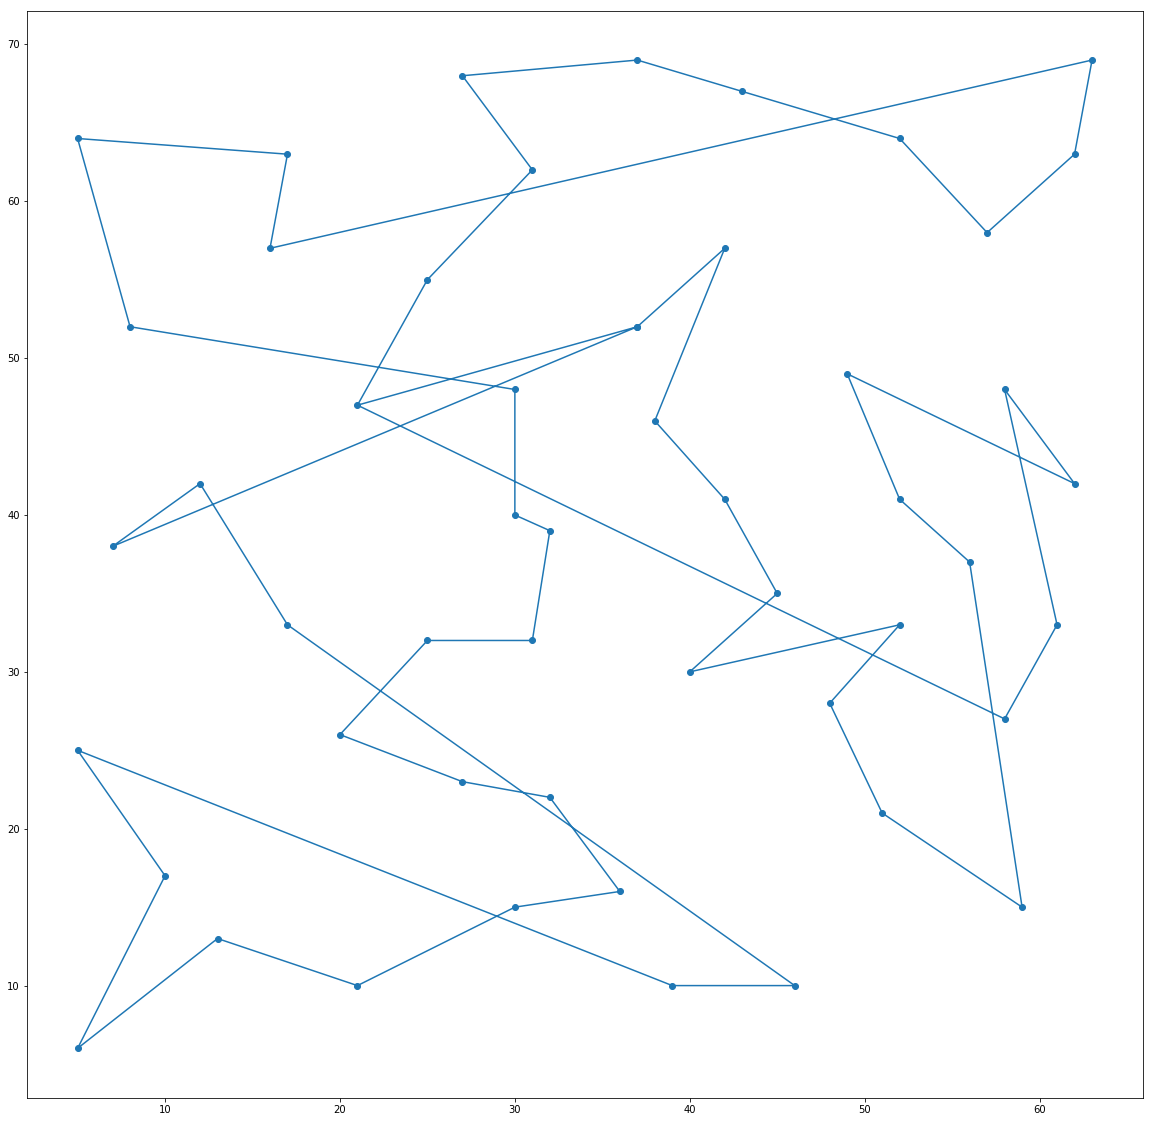

Total execution time is:  0.6746132373809814  seconds
Total distance is :  645


In [32]:
plt.figure(figsize=(20,20))

opt_route = list(opt_route)
opt_route.append(opt_route[0])
opt_route = np.array(opt_route)

data_json = list(data_json)
data_json.append(data_json[0])
data_json = np.array(data_json)

# Reorder the cities matrix by route order in a new matrix for plotting.
new_cities_order = np.concatenate((np.array([data_json[opt_route[i]] for i in range(len(opt_route))]),np.array([data_json[0]])))
# Plot the cities.
plt.scatter(data_json[:,0],data_json[:,1])
# Plot the path.
plt.plot(new_cities_order[:,0],new_cities_order[:,1])
plt.show()
print("Total execution time is: ",duration," seconds")
print("Total distance is : ",total_distance)